Sesi√≥n 2
Cargue y Exploraci√≥n

Por Angela Cristina Villate


**prepraci√≥n del entorno**

In [4]:
!pip install python-docx # Install the missing 'python-docx' library. Note it is NOT called 'docx'.
!pip install PyPDF2 # Install PyPDF2

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 232.6/232.6 kB 3.6 MB/s eta 0:00:00


**Se invocan las librer√≠as**

In [66]:
import os  # Manejo de archivos y carpetas
import PyPDF2  # Lectura de archivos PDF
import docx  # Lectura de archivos Word
import nltk  # Procesamiento de texto natural
from collections import Counter  # Contar ocurrencias de palabras
import matplotlib.pyplot as plt  # Generar gr√°ficos
import pandas as pd

In [12]:
# Descargar recursos necesarios para tokenizaci√≥n y stopwords en espa√±ol
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Cargue de documentos en word**

In [14]:
# 1. Cargar un documento Word y mostrar contenido
texto_word = cargar_word("/content/C-230-16.docx")  # Ruta en Colab
print(texto_word)  # Muestra el texto extra√≠do del Word

Sentencia C-230/16


REFORMA DE EQUILIBRIO DE PODERES Y REAJUSTE INSTITUCIONAL-Mecanismos autorizados para reformar la prohibici√≥n de reelecci√≥n presidencial

DEMANDA DE INCONSTITUCIONALIDAD POR VICIOS DE FORMA-Caducidad 

DEMANDA DE INCONSTITUCIONALIDAD CONTRA ACTOS LEGISLATIVOS-Cargos por vicios de procedimiento en su formaci√≥n/DEMANDA DE INCONSTITUCIONALIDAD DE ACTO REFORMATORIO DE LA CONSTITUCION-Cargos por vicios de procedimiento en su formaci√≥n

DEMANDA DE INCONSTITUCIONALIDAD POR VICIOS DE COMPETENCIA-Requisitos m√≠nimos

DEMANDA DE INCONSTITUCIONALIDAD-Objeto y concepto de la violaci√≥n

DEMANDA DE INCONSTITUCIONALIDAD-Razones claras, ciertas, espec√≠ficas, pertinentes y suficientes

DEMANDA DE INCONSTITUCIONALIDAD DE ACTO LEGISLATIVO POR DESBORDAMIENTO DE LA COMPETENCIA DEL CONSTITUYENTE DERIVADO-Cumplimiento de requisitos

ACCION PUBLICA DE INCONSTITUCIONALIDAD-Cualificaci√≥n/DEMANDA DE INCONSTITUCIONALIDAD CONTRA ACTOS REFORMATORIOS POR SUSTITUCION DE LA CONSTITUCION-Cum

**Cargue de documentos en PDF**

In [16]:
# 2. Cargar un documento PDF y mostrar contenido

# Ruta del archivo PDF
ruta_pdf = "/content/CORREGIDA  22-300219 CONFIRMA - APELACION CRISTAL SAS VU.pdf"

# Abrir el PDF en modo lectura binaria
archivo = open(ruta_pdf, "rb")

# Crear un lector de PDF
lector = PyPDF2.PdfReader(archivo)

# Extraer texto de todas las p√°ginas
texto = ""
for pagina in lector.pages:
    texto += pagina.extract_text() + "\n"

# Cerrar el archivo
archivo.close()

# Mostrar el texto extra√≠do
print(texto)

 
MINISTERIO DE COMERCIO, INDUSTRIA Y TURISMO  
 SUPERINTENDENCIA DE INDUSTRIA Y COMERCIO   
 
 
RESOLUCI√ìN N√öMERO _ 43866 _ DE 20 23 
(Julio 31 de 2023 ) 
 
Por la cual se resuelve un recur so de apelaci√≥n  
 
 
Radicaci√≥n: 22 -300219                                                                          
 
 
LA SUPERINTENDENTE  DELEGAD A PARA  LA PROTECCI√ìN  DE DATOS  PERSONALES  
 
En ejercicio de sus facultades legales, en especial las conferidas por los art√≠culos 19 y 21 de la Ley 
1581 de 2012 y el numeral 8 del art√≠cu lo 16 del D ecreto 4886 de 2011 (modificado por el Decreto 092 
de 2022), y  
 
CONSIDERANDO:  
 
PRIMERO.  Que m ediante Resoluci√≥n No. 58054  del 29 de agosto  de 2022 , la Direcci√≥n de 
Investigaci√≥n de Protecci√≥n de Datos Personales orden√≥ a la sociedad CRISTAL 2010  SAS, lo 
siguiente:  
 
‚ÄúART√çCULO PRIMERO: ORDENAR a la sociedad CRISTAL 2010 SAS que documente, implemente y monitoree 
una pol√≠tica de seguridad de la informaci√≥n que contenga 

**Preprocesamiento de textos: pasar a min√∫sculas, tokenizar y eliminar stop words**

In [19]:
import nltk

# Download the 'punkt_tab' data package
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [20]:
# Preprocesamiento del texto extra√≠do del PDF
texto_pdf = texto  # Asigna el texto extra√≠do a texto_pdf
texto_pdf = texto_pdf.lower()  # Convertir a min√∫sculas
palabras = nltk.word_tokenize(texto_pdf, language='spanish')  # Tokenizaci√≥n
palabras = [p for p in palabras if p.isalnum()]  # Filtrar palabras alfanum√©ricas

In [22]:
palabras;

In [23]:
# Eliminar stopwords en espa√±ol
stop_words = set(stopwords.words('spanish'))
palabras_limpias = [p for p in palabras if p not in stop_words]

In [25]:
palabras_limpias;

**Conteo de palabras**

In [26]:
# Contar palabras m√°s frecuentes
conteo = Counter(palabras_limpias)
palabras_comunes = conteo.most_common(20)  # Top 20 palabras

In [27]:
palabras_comunes

[('datos', 27),
 ('resoluci√≥n', 14),
 ('personales', 14),
 ('sociedad', 13),
 ('seguridad', 13),
 ('s', 12),
 ('2022', 11),
 ('informaci√≥n', 11),
 ('medidas', 11),
 ('l', 10),
 ('d', 9),
 ('art√≠culo', 9),
 ('bases', 9),
 ('protecci√≥n', 8),
 ('58054', 8),
 ('recurso', 8),
 ('tratamiento', 8),
 ('29', 7),
 ('agosto', 7),
 ('registro', 7)]

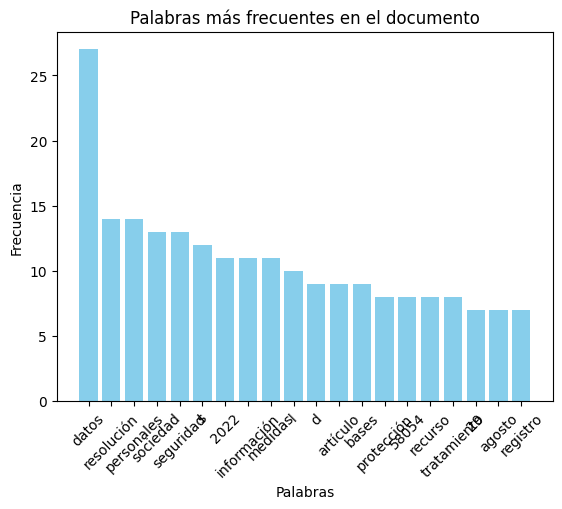

In [28]:
# Visualizaci√≥n
palabras, frecuencias = zip(*palabras_comunes)  # Separar palabras y frecuencias
plt.bar(palabras, frecuencias, color='skyblue')
plt.xticks(rotation=45)
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")
plt.title("Palabras m√°s frecuentes en el documento")
plt.show()

**Lectura de varios documentos, en carpeta**

In [47]:
!pip install py7zr # Install the py7zr library before attempting to import it.

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 67.9/67.9 kB 2.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.9/2.9 MB 36.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 96.2/96.2 kB 7.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 50.6/50.6 kB 3.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.3/2.3 MB 74.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 141.3/141.3 kB 11.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [71]:
import os  # M√≥dulo para manejar rutas y archivos
import py7zr  # Librer√≠a para extraer archivos .7z
import PyPDF2  # Librer√≠a para leer archivos PDF

In [73]:
# Configurar stop words en espa√±ol
stop_words = set(stopwords.words('spanish'))

In [74]:
# üìÇ Ruta del archivo .7z y carpeta destino
ruta_7z = "/content/Docs Sesi√≥n 2 - copia.7z"
carpeta_destino = "/content/Docs_Sesion_2"

In [75]:
# üîπ Extraer archivos del .7z
with py7zr.SevenZipFile(ruta_7z, mode='r') as archivo:
    archivo.extractall(path=carpeta_destino)

print("‚úÖ Archivos extra√≠dos correctamente.")

‚úÖ Archivos extra√≠dos correctamente.


In [76]:
# üìÇ Ruta donde est√°n los PDFs extra√≠dos
ruta_pdfs = os.path.join(carpeta_destino, "Docs Sesi√≥n 2 - copia")

In [77]:
# üîπ Verificar si hay PDFs
pdfs = [archivo for archivo in os.listdir(ruta_pdfs) if archivo.endswith(".pdf")]

if not pdfs:
    print("‚ö†Ô∏è No se encontraron archivos PDF en la carpeta extra√≠da.")
else:
    print("‚úÖ PDFs encontrados:")
    for pdf in pdfs:
        print("-", pdf)

‚úÖ PDFs encontrados:
- version corregida 25-07 Resolucion rad 19-78098 - R2 VU.pdf
- CORREGIDA  22-300219 CONFIRMA - APELACION CRISTAL SAS VU.pdf
- CORREGIDA RAD  21-210342 CONFIRMA - ARCHIVO_doc VP.pdf
- RE60011-2024.pdf


In [78]:
# üîπ Leer y preprocesar texto de todos los PDFs
texto_total = ""

for archivo in pdfs:
    ruta_pdf = os.path.join(ruta_pdfs, archivo)
    with open(ruta_pdf, "rb") as f:
        lector = PyPDF2.PdfReader(f)
        for pagina in lector.pages:
            texto_total += pagina.extract_text() + " "


In [79]:
texto_total

' \n \nMINISTERIO DE COMERCIO, INDUSTRIA Y TURISMO  \n SUPERINTENDENCIA DE INDUSTRIA Y COMERCIO   \n \nRESOLUCI√ìN N√öMERO _ 42570 _ DE 20 23 \n \n(Julio 27 de 2023 ) \n \n‚ÄúPor la cual se resuelve un recurso de apelaci√≥n ‚Äù \n \nRadicaci√≥n  19-78098  \n \n \nLA SUPERINTENDENTE  DELEGA DA PARA  LA PROTECCI√ìN  DE DATOS  PERSONALES  \n \nEn ejercicio de sus facultades legales, en especial las conferidas por los art√≠culos 19 y 21 de la  \nLey 1581 de 2012 y el numeral 8 del art√≠culo 16 del Decreto 4886 de 2011  (modificado por el  \nDecreto 092 de 2022) , y \n \nCONSID ERANDO  \n \nPRIMERO . Que, mediante Resoluci√≥n No. 51177  del 1 de agosto  de 20 22, la Direcci√≥n de \nInvestigaci√≥n de Protecci√≥n de Datos Personales , respecto de la actuaci√≥n adelantada en contra \nde la CL√çNICA DE LA VISI√ìN DEL VALLE S.A.S.  resolvi√≥ lo  siguiente :  \n \n‚ÄúART√çCULO PRIMERO: IMPONER una sanci√≥n pecuniaria a la sociedad CL√çNICA DE LA VISI√ìN DEL \nVALLE S.A.S. , identificada con NIT 8

In [80]:
# üîπ Preprocesamiento: min√∫sculas, tokenizaci√≥n, eliminaci√≥n de stop words
tokens = word_tokenize(texto_total.lower(), language="spanish")
tokens_limpios = [t for t in tokens if t.isalnum() and t not in stop_words]

In [81]:
# üîπ Contar frecuencia de palabras
frecuencia = Counter(tokens_limpios)
frecuencia_comunes = frecuencia.most_common(50)

In [82]:
# üìä Crear DataFrame con las 50 palabras m√°s frecuentes
df_frecuencia = pd.DataFrame(frecuencia_comunes, columns=["Palabra", "Frecuencia"])

In [83]:
# üîπ Mostrar tabla
print("\nüìä **Tabla de las 50 palabras m√°s frecuentes:**")
print(df_frecuencia)


üìä **Tabla de las 50 palabras m√°s frecuentes:**
             Palabra  Frecuencia
0              datos         187
1           art√≠culo         148
2                ley         117
3         personales         102
4        tratamiento          99
5           sociedad          82
6         resoluci√≥n          67
7               1581          67
8               2012          63
9                ser          60
10           sanci√≥n          59
11           titular          59
12                 l          58
13      autorizaci√≥n          55
14                 n          53
15              debe          53
16       informaci√≥n          52
17            n√∫mero          50
18                 s          50
19                 c          49
20                 4          46
21    consentimiento          46
22           literal          45
23           derecho          45
24                √≥n          44
25        protecci√≥n          43
26                 √≥          43
27             

In [84]:
# Opcional: Exportar a CSV
df_frecuencia.to_csv("/content/Frecuencia_palabras.csv", index=False)
print("\n‚úÖ Tabla guardada como 'Frecuencia_palabras.csv'.")


‚úÖ Tabla guardada como 'Frecuencia_palabras.csv'.
